<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/colab/cifar/knn/CIFAR10_KNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
train_labels.shape (one-hot) = (50000, 10)
test_labels.shape (one-hot) = (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step
Train Features Shape: (50000, 2048)
Test Features Shape: (10000, 2048)
KNN Accuracy: 0.392


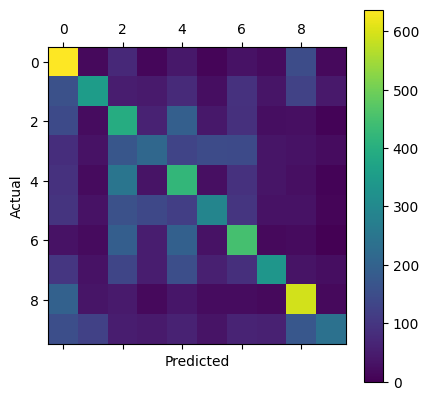

[[637  15  73  11  41   9  30  18 149  17]
 [157 351  51  46  76  24  91  35 126  43]
 [142  21 394  62 194  42  88  23  27   7]
 [ 84  30 170 213 131 145 142  35  30  20]
 [ 91  19 248  34 423  25  92  36  25   7]
 [ 97  32 158 138 117 289  99  31  31   8]
 [ 30  18 190  50 196  31 449  17  19   0]
 [100  30 132  51 154  56  85 334  34  24]
 [197  36  45  15  39  20  22  17 593  16]
 [152 124  50  47  62  33  64  58 173 237]]


In [5]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# plt.figure(figsize=(10, 2))
# for i in range(5):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(X_train[i])
#     plt.title(class_names[y_train[i][0]])  # CIFAR-10 클래스 이름 표시
#     plt.axis('off')
# plt.show()

# 레이블을 one-hot encoding으로 변환
train_labels = keras.utils.to_categorical(y_train, 10)
test_labels = keras.utils.to_categorical(y_test, 10)

print('train_labels.shape (one-hot) =', train_labels.shape)
print('test_labels.shape (one-hot) =', test_labels.shape)

train_images, test_images = X_train / 255, X_test / 255


# CNN 모델 정의 (특성 추출기로만 사용함)
# MLP 구조 그대로 유지함 (v1)
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten()  # MLP 연결 안함

])

# CNN 특성 추출
X_train_features = cnn_model.predict(train_images)
X_test_features = cnn_model.predict(test_images)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# KNN 모델 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features, np.argmax(train_labels, axis=1))  # 원핫 방식을 정수형 라벨로 변환

# KNN 예측 및 평가
y_pred = knn.predict(X_test_features)
knn_accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred)
print("KNN Accuracy:", knn_accuracy)

# 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(test_labels, axis=1), y_pred)
plt.matshow(conf_mat)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(conf_mat)

cnn에서

```python
keras.layers.Flatten()
```

위 코드를 추가하지 않으면


```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-5-c87b139da04b> in <cell line: 83>()
     81
     82 knn = KNeighborsClassifier(n_neighbors=5)
---> 83 knn.fit(X_train_features, np.argmax(train_labels, axis=1))  # One-hot -> integer labels
     84
     85 # KNN 예측 및 평가

5 frames
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py in check_array(array, accept_sparse, accept_large_sparse, dtype, order, copy, force_writeable, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator, input_name)
   1056             )
   1057         if not allow_nd and array.ndim >= 3:
-> 1058             raise ValueError(
   1059                 "Found array with dim %d. %s expected <= 2."
   1060                 % (array.ndim, estimator_name)

ValueError: Found array with dim 4. KNeighborsClassifier expected <= 2.
```

array가 4차원이고, KNeighborsClassifier는 2차원 이하의 데이터만 처리할 수 있어 에러가 발생한다. 따라서 이를 모두 1열로 펼치는 Flatten()을 이용했다.

```
X_train_features = cnn_model.predict(train_images)
X_test_features = cnn_model.predict(test_images)
```
이미지 데이터에서 특성 백터만을 추출한다. 이는 KNN의 입력 데이터로 들어간다. (MLP 연결 x)

```
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features, np.argmax(train_labels, axis=1))
```
이때, fit을 할 때 데이터와 레이블의 개수가 모두 동일해야 한다.
train_labels는 원핫 인코딩되어있기 때문에 2의 경우 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 형태의 데이터가 들어가있다.
np.argmax는 axis=1 배열을 1d로 간주했을 때 최대값의 위치를 반환한다. 따라서 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]는 label 2로 간주되며, 이었다면 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 이 모양이 되므로 label 0으로 간주된다.
따라서 클래스를 분류하는 정수 레이블로 대체할 수 있다. (맞나?)

이후 이 데이터를 가지고 fit 메서드를 사용하여 knn에 입력한다.


